In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
#load and check the data
df_origin = pd.read_csv('./dirty_data.csv')
df_origin.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
# Since we are doing a classification problem, the collumn that matters would be the class
label = df_origin['class']
df_origin.rename(columns ={'class':'category'}, inplace = True)

#I will merge the three categorical columns into one.
category = df_origin['category'].map({0: 'hate_speech', 1: 'offensive_lang', 2: 'neither'})

#now I will merge the tweets the two columns I create with the tweets.
tweet = df_origin['tweet']

df = pd.concat([tweet,category,label], axis = 1)
df

,tweet,category,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_lang,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_lang,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_lang,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_lang,1
...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive_lang,1
24779,"you've gone and broke the wrong heart baby, an...",neither,2
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive_lang,1
24781,youu got wild bitches tellin you lies,offensive_lang,1


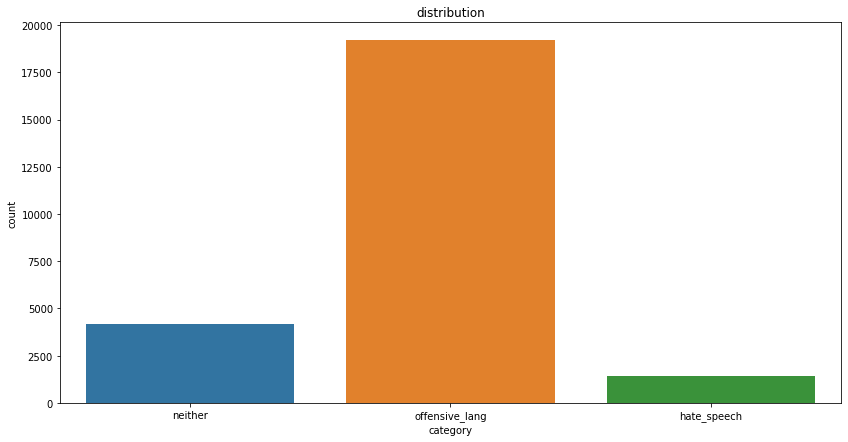

In [10]:
#plotting distribution of categories
fig = plt.figure(figsize=(14,7))
plt.title('distribution')
graph = sns.countplot(x='category', data=df)
for category in graph.patches:
    height = category.get_height()

### Making that text squeaky clean before any other preprocessing

In [21]:
from wordcloud import WordCloud
import re
import html

In [22]:
#cleaning text means BERT will spend less time processing useless things

def clean(text: str) -> str:
    '''Normalizes a text sample'''

    # todo: deal with numbers, translate abbreviations
    
    # twitter specific: remove RT CC ^!
    text = re.sub(r'(RT[:\s])|(CC[:\s])|(^!+)', r'', text)
    
    # unescape html
    text = html.unescape(text)
    # remove mentions
    text = re.sub(r'(^|.)@[^\s]*', r'', text)
    # remove urls
    text = re.sub(r'https?:\/\/[^\s]*', r'', text)
    # remove unwanted characters
    text = re.sub(r"[^\w\s\d']+", r' ', text)
    # remove repeated special characters
    text = re.sub(r"(['])[']+", r'\1', text)
    # remove extra spaces
    text = re.sub(r'\s{2,}', r' ', text)
    
    return text

In [25]:
df_cleaned = df.copy()
df_cleaned['tweet'] = df_cleaned['tweet'].apply(clean)
df_cleaned['tweet'].head()

0     As a woman you shouldn't complain about clean...
1     boy dats cold tyga dwn bad for cuffin dat hoe...
2     Dawg You ever fuck a bitch and she start to c...
3                               she look like a tranny
4     The shit you hear about me might be true or i...
Name: tweet, dtype: object

In [26]:
df_cleaned.to_csv('clean_v1.csv')

### Preprocessing to balance out categories to continue later...